<a href="https://colab.research.google.com/github/Narendra-Singh-shekhawat/Insulin-drug-classification-models/blob/master/classification_problem_on_insulin_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import ttest_1samp,ttest_ind,levene,shapiro,bartlett,wilcoxon,mannwhitneyu,chi2_contingency
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/My Drive/diabetic_data.csv")

In [ ]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
max_glu_serum,None,None,None,None,None
A1Cresult,None,None,None,None,None
metformin,No,No,No,No,No
repaglinide,No,No,No,No,No
nateglinide,No,No,No,No,No
chlorpropamide,No,No,No,No,No
glimepiride,No,No,No,No,No
acetohexamide,No,No,No,No,No
glipizide,No,No,Steady,No,Steady


In [ ]:
df1=pd.read_excel("/content/drive/My Drive/Diagnosis_session.xlsx")

In [ ]:
df2=pd.read_excel("/content/drive/My Drive/Lab-session.xlsx")

In [ ]:
df2.drop(columns='encounter_id',inplace=True)
df2.head(3)

,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,41,0,1,0,0,0
1,59,0,18,0,0,0
2,11,5,13,2,0,1


In [ ]:
df3=pd.read_excel("/content/drive/My Drive/Paitent_details.xlsx")

In [ ]:
df3.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
df3.head(3)

,race,gender,age,weight
0,Caucasian,Female,[0-10),?
1,Caucasian,Female,[10-20),?
2,AfricanAmerican,Female,[20-30),?


In [ ]:
df4=pd.read_excel("/content/drive/My Drive/admission_details.xlsx")

In [ ]:
df4.drop(columns='patient_nbr',inplace=True)
df4.head(3)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
0,6,25,1,1,?,Pediatrics-Endocrinology
1,1,1,7,3,?,?
2,1,1,7,2,?,?


In [ ]:
frames = [df, df1, df2, df3, df4]
df_new = pd.concat(frames,axis=1)

In [ ]:
df_new.shape

(101766, 50)

In [ ]:
df_new.replace('?',np.nan,inplace=True)

In [ ]:
df_test=df_new.drop(['weight','payer_code','medical_specialty'],axis=1)

In [ ]:
df_test.shape

(101766, 47)

In [ ]:
df_test['race']=df_test.race.replace(np.nan,'?')

In [ ]:
df_test["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [ ]:
df_test["race"].mode()

0    Caucasian
dtype: object

In [ ]:
df_test['race']=df_test.race.replace('?','Caucasian')

In [ ]:
 df_test = df_test.drop(['diag_1','diag_2','diag_3'],axis = 1)

In [ ]:
df_test.shape

(101766, 44)

In [ ]:
df_test=df_test[~df_test.discharge_disposition_id.isin([11,13,14,19,20,21])]
df_test.shape

(99343, 44)

In [ ]:
df_test['diabetesMed'].value_counts()

Yes    76719
No     22624
Name: diabetesMed, dtype: int64

In [ ]:
df_test=df_test[df_test['diabetesMed']=='Yes']
df_test.shape

(76719, 44)

In [ ]:
df_test=df_test[df_test['readmitted']=='NO']
df_test.shape

(39355, 44)

In [ ]:
target = df_test[['encounter_id','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]

In [ ]:
for features in target.columns:
    a=target[features].value_counts()
    print(a)

116046918    1
136197984    1
148022622    1
255832266    1
63079770     1
            ..
92851494     1
98425422     1
103559976    1
151112268    1
77856768     1
Name: encounter_id, Length: 39355, dtype: int64
No        28151
Steady    10261
Up          628
Down        315
Name: metformin, dtype: int64
No        38682
Steady      598
Up           54
Down         21
Name: repaglinide, dtype: int64
No        39008
Steady      328
Up           13
Down          6
Name: nateglinide, dtype: int64
No        39309
Steady       44
Up            1
Down          1
Name: chlorpropamide, dtype: int64
No        36667
Steady     2406
Up          183
Down         99
Name: glimepiride, dtype: int64
No    39355
Name: acetohexamide, dtype: int64
No        32998
Steady     5725
Up          379
Down        253
Name: glipizide, dtype: int64
No        33676
Steady     4952
Up          442
Down        285
Name: glyburide, dtype: int64
No        39342
Steady       13
Name: tolbutamide, dtype: int64
No      

In [ ]:
target.shape

(39355, 24)

In [ ]:
target.set_index('encounter_id',inplace=True)

In [ ]:
target=target.replace(['No','Steady','Up','Down'],[0,1,1,1])
target.head().T

encounter_id,64410,500364,16680,55842,12522
metformin,0,0,0,1,0
repaglinide,0,0,0,0,0
nateglinide,0,0,0,0,0
chlorpropamide,0,0,0,0,0
glimepiride,0,0,0,1,0
acetohexamide,0,0,0,0,0
glipizide,1,0,1,0,1
glyburide,0,0,0,0,0
tolbutamide,0,0,0,0,0
pioglitazone,0,0,0,0,0


In [ ]:
target[target['insulin']==1].sum(axis = 1).value_counts()

1    14675
2     7906
3     3491
4      709
5       38
6        1
dtype: int64

In [ ]:
insulin1= target[target['insulin']==1].sum(axis = 1).replace([1,2,3,4,5,6],['insulin','iwo','iwo','iwo','iwo','iwo'])

In [ ]:
insulin1.value_counts()

insulin    14675
iwo        12145
dtype: int64

In [ ]:
target[target['insulin']==0].sum(axis = 1).value_counts()

1    8405
2    3491
3     617
4      21
5       1
dtype: int64

In [ ]:
insulin0=target[target['insulin']==0].sum(axis=1).replace([0,1,2,3,4,5,6],['no med','other','other','other','other','other','other'])

In [ ]:
target=pd.concat([insulin1,insulin0])
target=pd.DataFrame({'target':target})

In [ ]:
df_test_model=df_test.join(target,on='encounter_id') 

In [ ]:
df_test_model = df_test_model.drop(['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)

In [ ]:
df_test_model2=df_test_model[df_test_model['target']!='other']
df_test_model2['target'].value_counts()

insulin    14675
iwo        12145
Name: target, dtype: int64

In [ ]:
df_test_model2= df_test_model2.drop(['diabetesMed','readmitted'],axis=1)

In [ ]:
a=['race', 'gender','max_glu_serum', 'A1Cresult', 'change']
df_test_model3=pd.get_dummies(data=df_test_model2,columns=a)

In [ ]:
df_test_model3['target'].value_counts()

insulin    14675
iwo        12145
Name: target, dtype: int64

In [ ]:
df_test_model3['target'].replace({'insulin':1,'iwo':0},inplace=True)

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_test_model3['age'] = label_encoder.fit_transform(df_test_model3['age'])

In [ ]:
df_data=df_test_model3

In [ ]:
df_data.columns

Index(['encounter_id', 'patient_nbr', 'number_diagnoses', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'target', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male',
       'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'change_Ch', 'change_No'],
      dtype='object')

In [ ]:
df_data= df_data.drop(['encounter_id','patient_nbr','num_lab_procedures','number_outpatient','number_emergency','number_diagnoses',
           'num_procedures','num_medications','number_inpatient','admission_type_id','discharge_disposition_id',
           'admission_source_id','time_in_hospital'],axis=1)


In [ ]:
from scipy.stats import chi2_contingency
features=[]
for i in df_data.columns:
   pvalue=0    
   cross=pd.crosstab(df_data["target"],df_data[i])
   pvalue=chi2_contingency(cross)[1]
   print("CHI",i,pvalue)
   if pvalue>0.01:
           features.append(i)
print(features)

CHI age 2.775114068540062e-131
CHI target 0.0
CHI race_AfricanAmerican 1.331904726484493e-09
CHI race_Asian 0.1119014464869679
CHI race_Caucasian 1.5390422004810406e-05
CHI race_Hispanic 0.006062667139464667
CHI race_Other 0.8695499577910514
CHI gender_Female 0.0007455878902077142
CHI gender_Male 0.0007455878902077154
CHI max_glu_serum_>200 0.18633685955737114
CHI max_glu_serum_>300 0.0020671822251822998
CHI max_glu_serum_None 1.0928475739184751e-06
CHI max_glu_serum_Norm 0.00014929596365574938
CHI A1Cresult_>7 8.760827139666277e-05
CHI A1Cresult_>8 0.0666449616185189
CHI A1Cresult_None 0.005391495453234729
CHI A1Cresult_Norm 0.29409612237295135
CHI change_Ch 0.0
CHI change_No 0.0
['race_Asian', 'race_Other', 'max_glu_serum_>200', 'A1Cresult_>8', 'A1Cresult_Norm']


In [ ]:
x= df_data.drop(['race_Asian','race_Other','max_glu_serum_>200','A1Cresult_>8','A1Cresult_Norm','target'],axis=1)
y= df_data[['target']]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
knn=KNeighborsClassifier()

param={"n_neighbors":np.arange(1,50),"weights":["uniform","distance"]}

GS=GridSearchCV(knn,param,cv=15,scoring="roc_auc")

GS.fit(x,y)

GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
GS.best_params_

{'n_neighbors': 46, 'weights': 'uniform'}

In [ ]:
DT=DecisionTreeClassifier()
par_dt={"criterion":["gini","entropy"],"max_depth":np.arange(1,50)}
GS_dt=GridSearchCV(DT,par_dt,cv=15,scoring="roc_auc")
GS_dt.fit(x,y)

GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,

In [ ]:
GS_dt.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [ ]:
RF=RandomForestClassifier()
par_RF={"n_estimators":np.arange(1,100)}
GS_RF=GridSearchCV(RF,par_RF,cv=15,scoring="roc_auc")
GS_RF.fit(x,y)

GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=F...
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26,

In [ ]:
GS_RF.best_params_

{'n_estimators': 10}

In [ ]:
LR=LogisticRegression()
NB=GaussianNB()
KNN_final=KNeighborsClassifier(n_neighbors=46,weights='uniform')
DT=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6)
RF=RandomForestClassifier(n_estimators=10,random_state=0)
KNN_bag=BaggingClassifier(base_estimator=KNN_final,n_estimators=10,random_state=0)
LR_bag=BaggingClassifier(base_estimator=LR,n_estimators=10,random_state=0)
NB_bag=BaggingClassifier(base_estimator=NB,n_estimators=10,random_state=0)
DT_bag=BaggingClassifier(n_estimators=10,random_state=0)
#boosting models
LR_boost=AdaBoostClassifier(base_estimator=LR,n_estimators=300,random_state=0)
DT_boost=AdaBoostClassifier(base_estimator=DT,n_estimators=50,random_state=0)
RF_boost=AdaBoostClassifier(base_estimator=RF,n_estimators=50,random_state=0)
NB_boost=AdaBoostClassifier(base_estimator=NB,n_estimators=50,random_state=0)

In [ ]:
models=[]
models.append(("Logistic",LR))
models.append(("NaiveBayes",NB))
models.append(("KNN_wv",KNN_final))
models.append(("DT",DT))
models.append(('RF',RF))
models.append(('BaggedkNN',KNN_bag))
models.append(('BaggedLR',LR_bag))
models.append(("BaggedNB",NB_bag))
models.append(("BaggedDT",DT_bag))
models.append(("BoostLR",LR_boost))
models.append(("BoostDT",DT_boost))
models.append(("BoostRF",RF_boost))
models.append(("BoostNB",NB_boost))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits = 15, random_state = 0)
    cv_results = model_selection.cross_val_score(model,x,y,cv = kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('NAME: {} ----- MEAN: {} ----- VAR: {} '.format(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

NAME: Logistic ----- MEAN: 0.813277988809967 ----- VAR: 0.00014242629696124872 
NAME: NaiveBayes ----- MEAN: 0.8161995144178852 ----- VAR: 0.00010603041325761598 
NAME: KNN_wv ----- MEAN: 0.8106244020792579 ----- VAR: 7.07963230976306e-05 
NAME: DT ----- MEAN: 0.8160375881915182 ----- VAR: 8.843487536824112e-05 
NAME: RF ----- MEAN: 0.8120282238524066 ----- VAR: 0.00010000714290338709 
NAME: BaggedkNN ----- MEAN: 0.8129805225141566 ----- VAR: 8.600105985108864e-05 
NAME: BaggedLR ----- MEAN: 0.813271773455344 ----- VAR: 0.00014117060396020344 
NAME: BaggedNB ----- MEAN: 0.8159617009214787 ----- VAR: 0.00010561900722406522 
NAME: BaggedDT ----- MEAN: 0.812000320893643 ----- VAR: 0.00010227021763932304 
NAME: BoostLR ----- MEAN: 0.8105931215912143 ----- VAR: 0.0001435822080821858 
NAME: BoostDT ----- MEAN: 0.8104880385938641 ----- VAR: 9.278746961416116e-05 
NAME: BoostRF ----- MEAN: 0.8119101566755277 ----- VAR: 9.598961397466351e-05 
NAME: BoostNB ----- MEAN: 0.7915251644016308 ----- V

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


Logistic
Here is our mean accuracy on the test set:
 0.772
Here is our mean accuracy on the train set:
 0.769


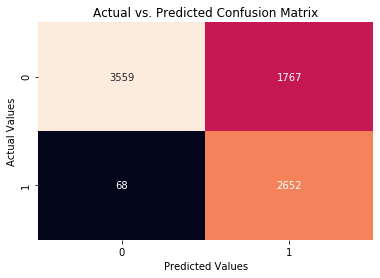


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.67      0.98      0.80      3627
           1       0.97      0.60      0.74      4419

    accuracy                           0.77      8046
   macro avg       0.82      0.79      0.77      8046
weighted avg       0.84      0.77      0.77      8046

--------------------------------------------------------

NaiveBayes
Here is our mean accuracy on the test set:
 0.762
Here is our mean accuracy on the train set:
 0.761


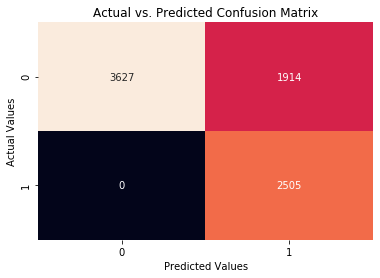


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.65      1.00      0.79      3627
           1       1.00      0.57      0.72      4419

    accuracy                           0.76      8046
   macro avg       0.83      0.78      0.76      8046
weighted avg       0.84      0.76      0.75      8046

--------------------------------------------------------

KNN_wv
Here is our mean accuracy on the test set:
 0.747
Here is our mean accuracy on the train set:
 0.751


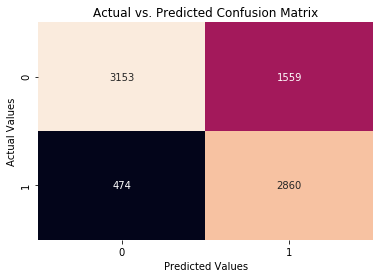


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.67      0.87      0.76      3627
           1       0.86      0.65      0.74      4419

    accuracy                           0.75      8046
   macro avg       0.76      0.76      0.75      8046
weighted avg       0.77      0.75      0.75      8046

--------------------------------------------------------

DT
Here is our mean accuracy on the test set:
 0.772
Here is our mean accuracy on the train set:
 0.778


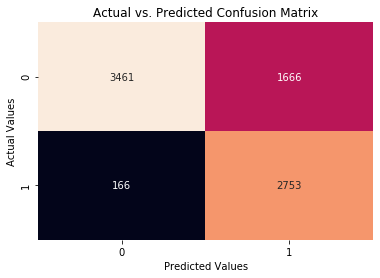


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.68      0.95      0.79      3627
           1       0.94      0.62      0.75      4419

    accuracy                           0.77      8046
   macro avg       0.81      0.79      0.77      8046
weighted avg       0.82      0.77      0.77      8046

--------------------------------------------------------

RF
Here is our mean accuracy on the test set:
 0.771
Here is our mean accuracy on the train set:
 0.778


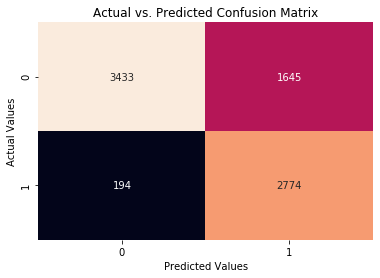


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.68      0.95      0.79      3627
           1       0.93      0.63      0.75      4419

    accuracy                           0.77      8046
   macro avg       0.81      0.79      0.77      8046
weighted avg       0.82      0.77      0.77      8046

--------------------------------------------------------

BaggedkNN
Here is our mean accuracy on the test set:
 0.774
Here is our mean accuracy on the train set:
 0.775


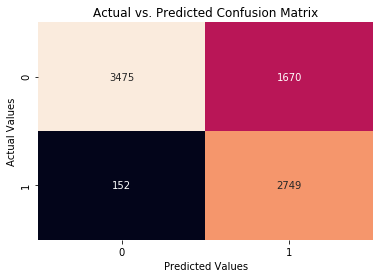


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.68      0.96      0.79      3627
           1       0.95      0.62      0.75      4419

    accuracy                           0.77      8046
   macro avg       0.81      0.79      0.77      8046
weighted avg       0.82      0.77      0.77      8046

--------------------------------------------------------

BaggedLR
Here is our mean accuracy on the test set:
 0.772
Here is our mean accuracy on the train set:
 0.769


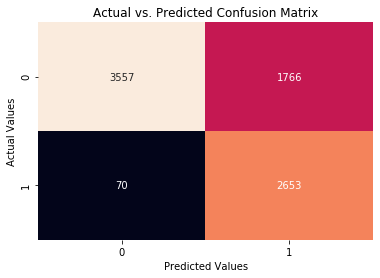


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.67      0.98      0.79      3627
           1       0.97      0.60      0.74      4419

    accuracy                           0.77      8046
   macro avg       0.82      0.79      0.77      8046
weighted avg       0.84      0.77      0.77      8046

--------------------------------------------------------

BaggedNB
Here is our mean accuracy on the test set:
 0.762
Here is our mean accuracy on the train set:
 0.761


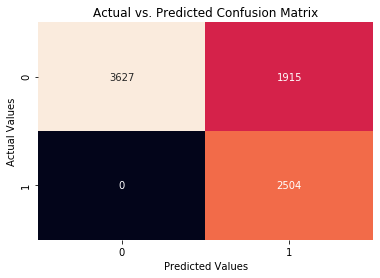


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.65      1.00      0.79      3627
           1       1.00      0.57      0.72      4419

    accuracy                           0.76      8046
   macro avg       0.83      0.78      0.76      8046
weighted avg       0.84      0.76      0.75      8046

--------------------------------------------------------

BaggedDT
Here is our mean accuracy on the test set:
 0.774
Here is our mean accuracy on the train set:
 0.777


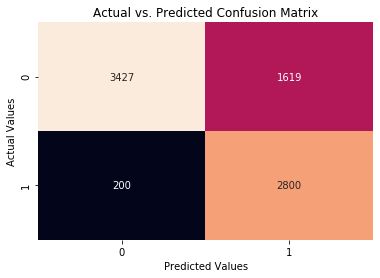


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.68      0.94      0.79      3627
           1       0.93      0.63      0.75      4419

    accuracy                           0.77      8046
   macro avg       0.81      0.79      0.77      8046
weighted avg       0.82      0.77      0.77      8046

--------------------------------------------------------

BoostLR
Here is our mean accuracy on the test set:
 0.767
Here is our mean accuracy on the train set:
 0.766


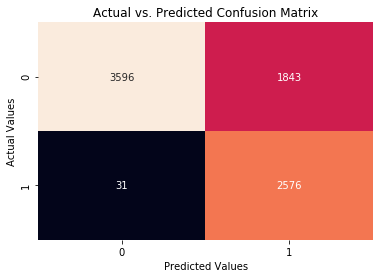


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.66      0.99      0.79      3627
           1       0.99      0.58      0.73      4419

    accuracy                           0.77      8046
   macro avg       0.82      0.79      0.76      8046
weighted avg       0.84      0.77      0.76      8046

--------------------------------------------------------

BoostDT
Here is our mean accuracy on the test set:
 0.773
Here is our mean accuracy on the train set:
 0.778


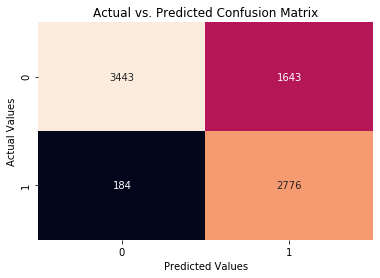


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.68      0.95      0.79      3627
           1       0.94      0.63      0.75      4419

    accuracy                           0.77      8046
   macro avg       0.81      0.79      0.77      8046
weighted avg       0.82      0.77      0.77      8046

--------------------------------------------------------

BoostRF
Here is our mean accuracy on the test set:
 0.772
Here is our mean accuracy on the train set:
 0.778


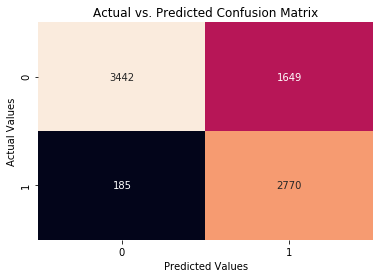


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.68      0.95      0.79      3627
           1       0.94      0.63      0.75      4419

    accuracy                           0.77      8046
   macro avg       0.81      0.79      0.77      8046
weighted avg       0.82      0.77      0.77      8046

--------------------------------------------------------

BoostNB
Here is our mean accuracy on the test set:
 0.549
Here is our mean accuracy on the train set:
 0.546


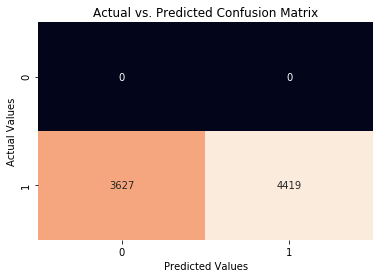


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3627
           1       0.55      1.00      0.71      4419

    accuracy                           0.55      8046
   macro avg       0.27      0.50      0.35      8046
weighted avg       0.30      0.55      0.39      8046

--------------------------------------------------------



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
#models = ['LR','NB','DT']
for name,model in models:
  print(name)
  model.fit(x_train,y_train)
  y_predict_LR=model.predict(x_test)
  accuracy_test =model.score(x_test,y_test)

  print("Here is our mean accuracy on the test set:\n {0:.3f}"\
        .format(accuracy_test))
  accuracy_train =model.score(x_train,y_train)

  print("Here is our mean accuracy on the train set:\n {0:.3f}"\
        .format(accuracy_train))
  confusion = metrics.confusion_matrix( y_predict_LR, y_test )
  sns.heatmap(confusion, annot=True, fmt='d', cbar=False)
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.title('Actual vs. Predicted Confusion Matrix')
  plt.show()
  print()
  print('CLASSIFICATION REPORT',classification_report(y_test, y_predict_LR))
  print('--------------------------------------------------------')
  print()

In [ ]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict_LR=LR.predict(x_test)

In [ ]:
confusion = metrics.confusion_matrix( y_predict_LR, y_test )
confusion

array([[3559, 1767],
       [  68, 2652]])

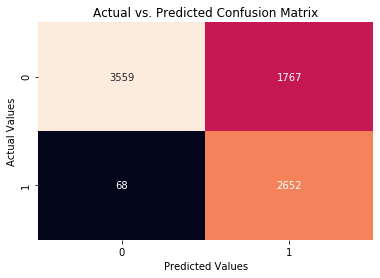

In [ ]:
confusion = metrics.confusion_matrix( y_predict_LR, y_test )
sns.heatmap(confusion, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [ ]:
accuracy_LR =LR.score(x_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_LR))

Here is our mean accuracy on the test set:
 0.772


In [ ]:
accuracy_LR =LR.score(x_train,y_train)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_LR))

Here is our mean accuracy on the test set:
 0.769


In [ ]:
classification_report(y_test, y_predict_LR)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      3627\n           1       0.55      1.00      0.71      4419\n\n    accuracy                           0.55      8046\n   macro avg       0.27      0.50      0.35      8046\nweighted avg       0.30      0.55      0.39      8046\n'

In [ ]:
sklearn.metrics.f1_score

NameError: ignored

In [ ]:
LR_boost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=300, random_state=0)

In [ ]:
y_predict_lr=LR_boost.predict(x_test)

In [ ]:
confusion = metrics.confusion_matrix( y_predict_lr, y_test )
confusion

array([[3596, 1843],
       [  31, 2576]])

In [ ]:
accuracy_LR_boost =LR_boost.score(x_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_LR))

Here is our mean accuracy on the test set:
 0.769


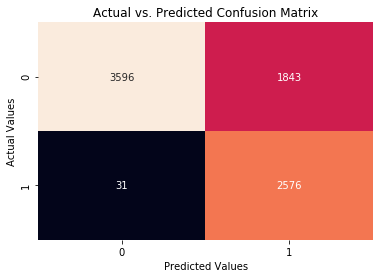

In [ ]:
confusion = metrics.confusion_matrix( y_predict_lr, y_test )
sns.heatmap(confusion, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [ ]:
accuracy_LR_boost =LR_boost.score(x_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_LR))

Here is our mean accuracy on the test set:
 0.769


In [ ]:
accuracy_LR_boost =LR_boost.score(x_train,y_train)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_LR))

Here is our mean accuracy on the test set:
 0.769


In [ ]:
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79      3627
           1       0.99      0.58      0.73      4419

    accuracy                           0.77      8046
   macro avg       0.82      0.79      0.76      8046
weighted avg       0.84      0.77      0.76      8046



In [ ]:
RF_boost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                         

In [ ]:
y_predict_RF=RF_boost.predict(x_test)

In [ ]:
confusion2 = metrics.confusion_matrix( y_predict_RF, y_test )
confusion2

array([[3442, 1649],
       [ 185, 2770]])

In [ ]:
accuracy_RF_boost =RF_boost.score(x_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_RF_boost))

Here is our mean accuracy on the test set:
 0.772


In [ ]:
accuracy_RF_boost =LR_boost.score(x_train,y_train)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_RF_boost))

Here is our mean accuracy on the test set:
 0.766


In [ ]:
training_set, test_set, class_set, test_class_set = train_test_split(X,Y,test_size = 0.20,random_state = 42)

NameError: ignored

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [ ]:
y_dt=DT.predict(x_test)

In [ ]:
confusion3 = metrics.confusion_matrix( y_dt, y_test )
confusion3

array([[3461, 1666],
       [ 166, 2753]])

In [ ]:
accuracy_DT =DT.score(x_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_DT))

Here is our mean accuracy on the test set:
 0.772


In [ ]:
accuracy_DT =DT.score(x_train,y_train)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_DT))

Here is our mean accuracy on the test set:
 0.778


In [ ]:
DT_boost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                          

In [ ]:
y_dt=DT_boost.predict(x_test)

In [ ]:
confusion3 = metrics.confusion_matrix( y_dt, y_test )
confusion3

array([[3443, 1643],
       [ 184, 2776]])

In [ ]:
accuracy_DT_boost =DT_boost.score(x_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_DT_boost))

Here is our mean accuracy on the test set:
 0.773


In [ ]:
accuracy_DT_boost =DT_boost.score(x_train,y_train)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_DT_boost))

Here is our mean accuracy on the test set:
 0.778


In [ ]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79      3627
           1       0.94      0.63      0.75      4419

    accuracy                           0.77      8046
   macro avg       0.81      0.79      0.77      8046
weighted avg       0.82      0.77      0.77      8046

